# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/) & Dominik Krzemiński

for El Passion, 2017

## 2. Data exploration

* [Pandas](http://pandas.pydata.org/) and [Seaborn](https://seaborn.pydata.org/)
* on data from Warsaw bike usage

Data from:

* [Dane z liczników rowerowych w Warszawie](http://greenelephant.pl/shiny/rowery/) by Monika Pawłowska (code: [github.com/pawlowska/shiny-server](https://github.com/pawlowska/shiny-server))
* original source: http://rowery.um.warszawa.pl/pomiary-ruchu-rowerowego

![](imgs/rowery_ECC2014205.gif)

In [1]:
# tabular data manipulation
import pandas as pd

# plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading CSV data
days = pd.read_csv("data/bicycles_weather.csv", index_col=0, parse_dates=[0])

In [4]:
# first entries
days.head()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,temp,weekday,month
2014-12-16,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,169.0,21.0,...,NaN,340.0,41.0,NaN,NaN,NaN,NaN,2.9,1,12
2014-12-17,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,167.0,38.0,...,NaN,313.0,28.0,NaN,NaN,NaN,NaN,-0.4,2,12
2014-12-18,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,154.0,13.0,...,NaN,290.0,20.0,NaN,NaN,NaN,NaN,-0.8,3,12
2014-12-19,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,100.0,15.0,...,NaN,209.0,15.0,NaN,NaN,NaN,NaN,5.5,4,12
2014-12-20,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,107.0,27.0,...,NaN,161.0,11.0,NaN,NaN,NaN,NaN,3.9,5,12


In [5]:
# last entries
days.tail()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,temp,weekday,month
2017-01-22,36.0,6.0,92.0,7.0,48.0,72.0,48.0,40.0,70.0,18.0,...,11.0,79.0,36.0,75.0,72.0,35.0,0.0,-0.1,6,1
2017-01-23,68.0,5.0,420.0,15.0,118.0,123.0,101.0,152.0,171.0,33.0,...,7.0,209.0,59.0,303.0,233.0,218.0,2.0,-2.2,0,1
2017-01-24,61.0,4.0,373.0,7.0,126.0,120.0,76.0,126.0,136.0,23.0,...,6.0,181.0,33.0,266.0,233.0,177.0,4.0,-4.0,1,1
2017-01-25,73.0,7.0,394.0,NaN,146.0,110.0,77.0,149.0,145.0,24.0,...,3.0,178.0,54.0,254.0,239.0,213.0,6.0,-1.4,2,1
2017-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.8,3,1


In [6]:
# rows and columns
days.shape

(773, 22)

In [9]:
# columns
days.columns

Index(['Al. USA - południe', 'Al. USA - północ', 'Banacha', 'Bazyliańska',
       'Belwederska', 'Dworzec Wilenski (al. Solidarności)',
       'Dworzec Wileński Nowy( Targowa)', 'Marszałkowska',
       'Most Gdanski - ścieżka rowerowa',
       'Most Gdański - ciąg pieszo-rowerowy',
       'NSR - Solec - ciąg pieszo-rowerowy', 'NSR-Solec - ścieżka rowerowa',
       'Rowery (Praska ścieżka rekreacyjna)', 'Wybrzeże Helskie', 'Wysockiego',
       'Świętokrzyska - Emilii Plater, płd',
       'Świętokrzyska - Emilii Plater, płn', 'Żwirki i Wigury/Trojdena1',
       'Żwirki i Wigury/Trojdena2', 'temp', 'weekday', 'month'],
      dtype='object')

In [10]:
# index
days.index[:5]

DatetimeIndex(['2014-12-16', '2014-12-17', '2014-12-18', '2014-12-19',
               '2014-12-20'],
              dtype='datetime64[ns]', freq=None)

In [7]:
# data for each column
days.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 773 entries, 2014-12-16 to 2017-01-26
Data columns (total 22 columns):
Al. USA - południe                     405 non-null float64
Al. USA - północ                       405 non-null float64
Banacha                                607 non-null float64
Bazyliańska                            770 non-null float64
Belwederska                            413 non-null float64
Dworzec Wilenski (al. Solidarności)    605 non-null float64
Dworzec Wileński Nowy( Targowa)        592 non-null float64
Marszałkowska                          483 non-null float64
Most Gdanski - ścieżka rowerowa        772 non-null float64
Most Gdański - ciąg pieszo-rowerowy    772 non-null float64
NSR - Solec - ciąg pieszo-rowerowy     772 non-null float64
NSR-Solec - ścieżka rowerowa           772 non-null float64
Rowery (Praska ścieżka rekreacyjna)    391 non-null float64
Wybrzeże Helskie                       772 non-null float64
Wysockiego                          

In [11]:
# selecting column and looking at its first 8 entries
days['weekday'].head(8)

2014-12-16    1
2014-12-17    2
2014-12-18    3
2014-12-19    4
2014-12-20    5
2014-12-21    6
2014-12-22    0
2014-12-23    1
Name: weekday, dtype: int64

In [12]:
# counting occurences
days['weekday'].value_counts()

3    111
2    111
1    111
6    110
5    110
4    110
0    110
Name: weekday, dtype: int64

In [14]:
# maximal values per column
days.max()

Al. USA - południe                     1537.0
Al. USA - północ                        932.0
Banacha                                5123.0
Bazyliańska                             435.0
Belwederska                            2299.0
Dworzec Wilenski (al. Solidarności)    2199.0
Dworzec Wileński Nowy( Targowa)        1732.0
Marszałkowska                          1864.0
Most Gdanski - ścieżka rowerowa        5285.0
Most Gdański - ciąg pieszo-rowerowy    3916.0
NSR - Solec - ciąg pieszo-rowerowy     3443.0
NSR-Solec - ścieżka rowerowa           3859.0
Rowery (Praska ścieżka rekreacyjna)    2644.0
Wybrzeże Helskie                       4512.0
Wysockiego                             1026.0
Świętokrzyska - Emilii Plater, płd     3681.0
Świętokrzyska - Emilii Plater, płn     2589.0
Żwirki i Wigury/Trojdena1              2880.0
Żwirki i Wigury/Trojdena2               665.0
temp                                     22.8
weekday                                   6.0
month                             

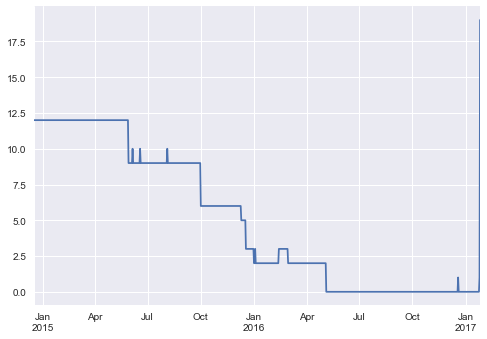

In [15]:
days.isnull().sum(axis=1).plot()

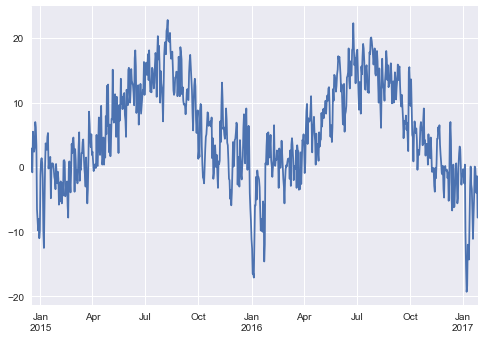

In [16]:
# temperature by day
days['temp'].plot()

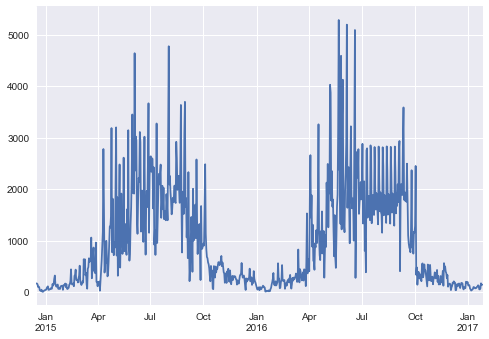

In [17]:
# ploting a series
days['Most Gdanski - ścieżka rowerowa'].plot()

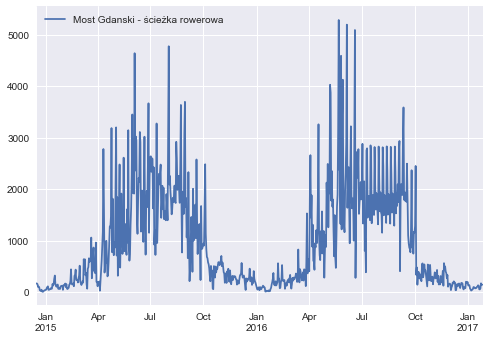

In [18]:
# plotting a 1-column DataFrame (splot the difference!)
days[['Most Gdanski - ścieżka rowerowa']].plot()

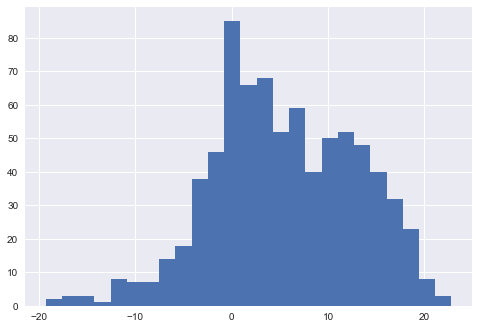

In [20]:
# number of days with each temperature
days['temp'].hist(bins=25)

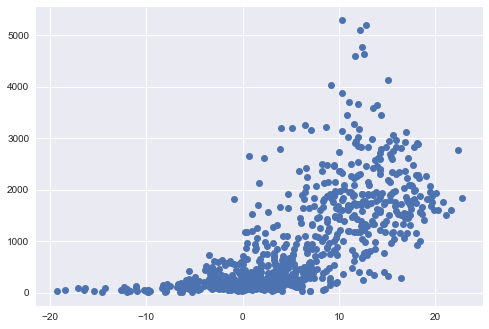

In [23]:
some_data = days[['Most Gdanski - ścieżka rowerowa', 'temp']].dropna()
plt.plot(some_data['temp'], some_data['Most Gdanski - ścieżka rowerowa'], 'o')

In [30]:
# filling missing values
days.fillna(0).head()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,temp,weekday,month
2014-12-16,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,169.0,21.0,...,0.0,340.0,41.0,0.0,0.0,0.0,0.0,2.9,1,12
2014-12-17,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,167.0,38.0,...,0.0,313.0,28.0,0.0,0.0,0.0,0.0,-0.4,2,12
2014-12-18,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,154.0,13.0,...,0.0,290.0,20.0,0.0,0.0,0.0,0.0,-0.8,3,12
2014-12-19,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,100.0,15.0,...,0.0,209.0,15.0,0.0,0.0,0.0,0.0,5.5,4,12
2014-12-20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,107.0,27.0,...,0.0,161.0,11.0,0.0,0.0,0.0,0.0,3.9,5,12


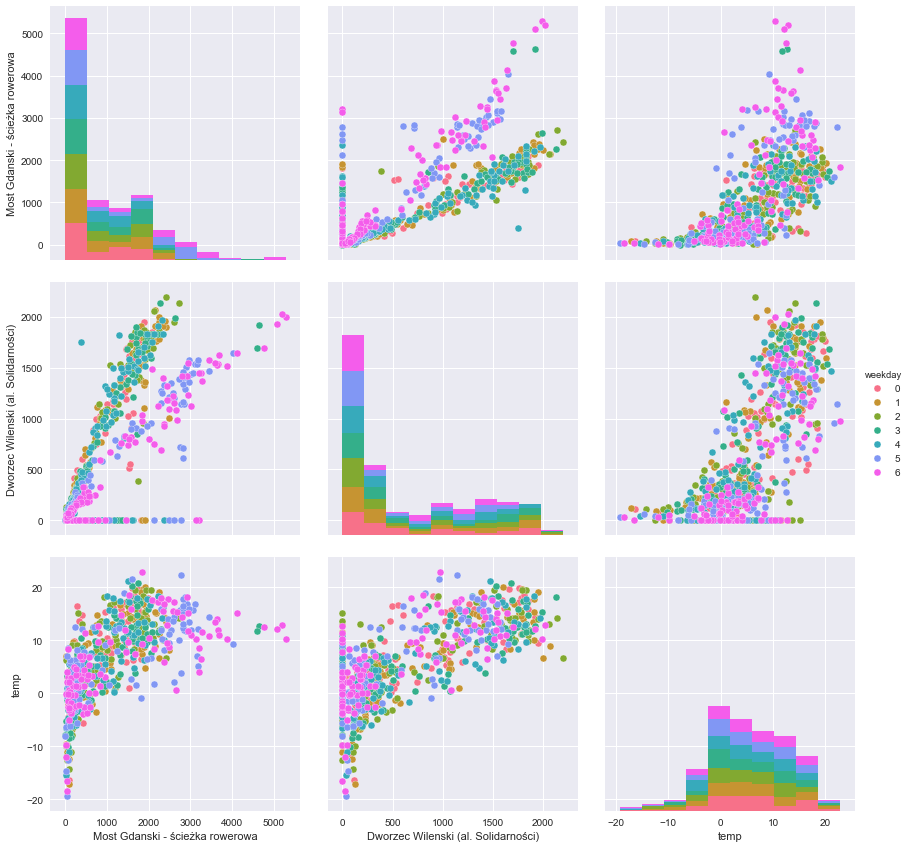

In [29]:
# scatter plots of pairs
sns.pairplot(data=days.fillna(0),
             vars=['Most Gdanski - ścieżka rowerowa',
                   'Dworzec Wilenski (al. Solidarności)',
                   'temp'],
             hue='weekday',
             dropna=True,
             size=4)

In [46]:
# creating a column, via:

# series method
days['is_weekend'] = days['weekday'].isin([5, 6])

# applying lambda function
days['is_weekend'] = days['weekday'].apply(lambda x: x in [5, 6])

# using a dictionary to map values
days['is_weekend'] = days['weekday'].map({0: False, 1: False, 2: False,
                               3: False, 4: False, 5: True, 6: True})

# now, use if for a nicer plot

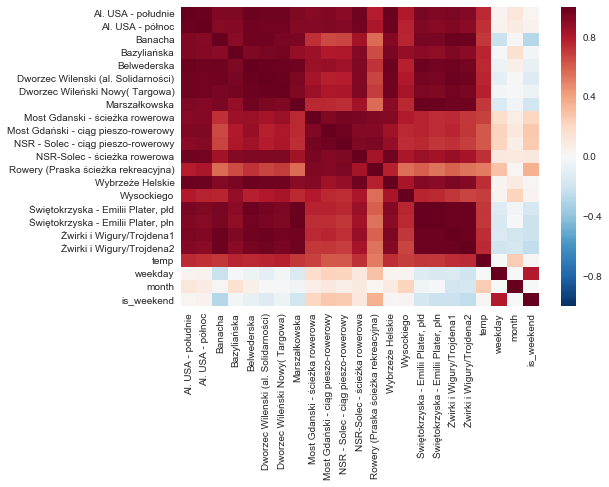

In [47]:
# correlation heatmap
sns.heatmap(days.corr())

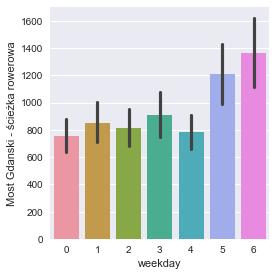

In [34]:
# averages of y per various factors
sns.factorplot(data=days.fillna(0),
               y='Most Gdanski - ścieżka rowerowa',
               x='weekday',
               kind='bar')

In [36]:
sns.factorplot?

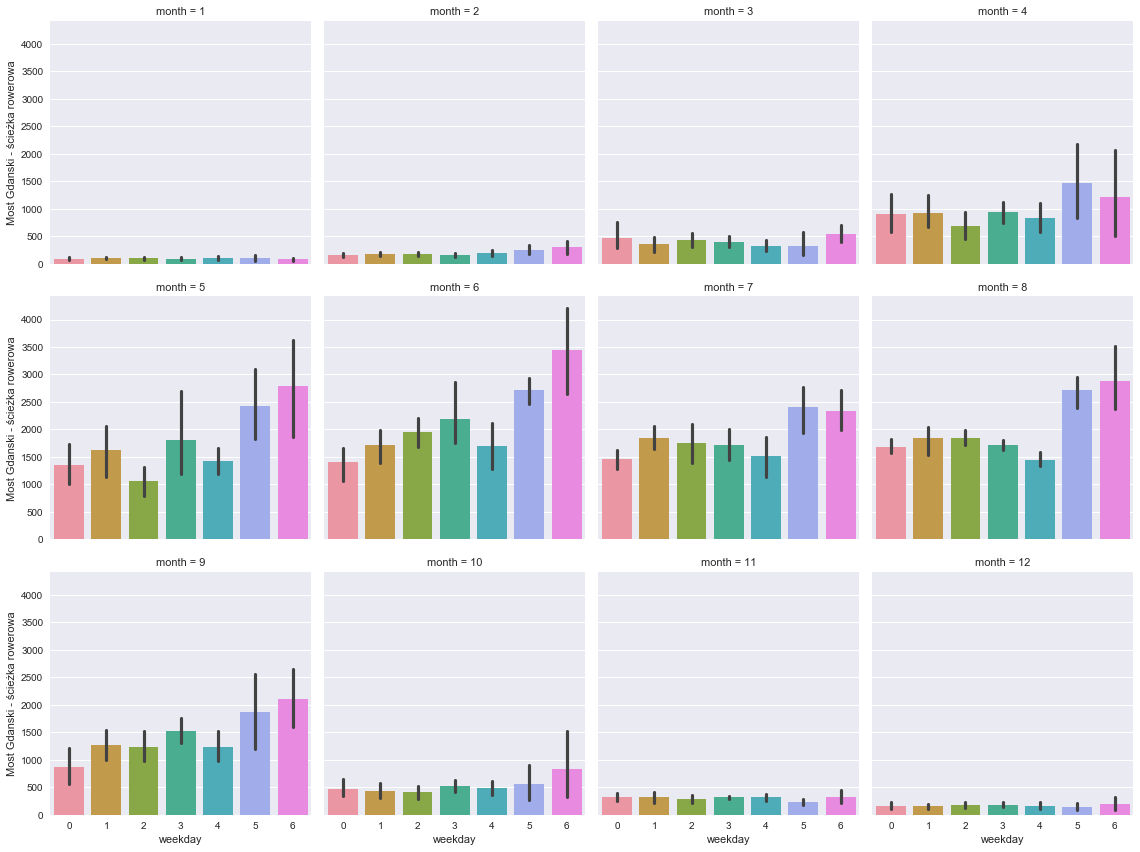

In [37]:
sns.factorplot(data=days.fillna(0),
               y='Most Gdanski - ścieżka rowerowa',
               x='weekday',
               col='month',
               col_wrap=4,
               kind='bar')

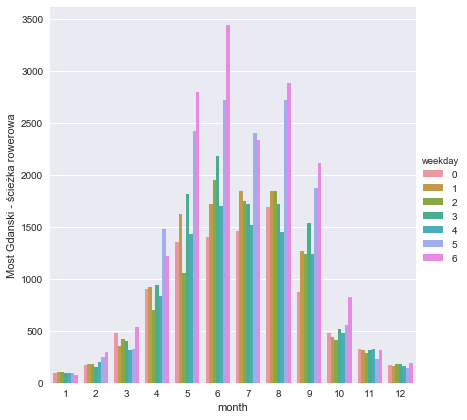

In [50]:
# same data, another plot
sns.factorplot(data=days.fillna(0),
               y='Most Gdanski - ścieżka rowerowa',
               x='month',
               hue='weekday',
               kind='bar',
               ci=None,
               size=6)

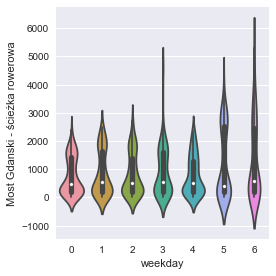

In [42]:
# violon plot
sns.factorplot(data=days.fillna(0),
               y='Most Gdanski - ścieżka rowerowa',
               x='weekday',
               kind='violin')

In [44]:
# SQL-like operations
days.groupby('weekday').mean()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,NSR-Solec - ścieżka rowerowa,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,temp,month
weekday,,,,,,,,,,,,,,,,,,,,,
0,363.620690,202.724138,2005.482759,107.036697,700.881356,828.379310,672.623529,577.710145,757.618182,419.527273,...,670.990909,226.803571,1144.363636,188.036364,1150.971014,840.260870,1159.842105,287.052632,5.753636,6.409091
1,405.500000,222.500000,2158.930233,112.513514,795.322034,878.344828,705.423529,613.260870,852.576577,440.567568,...,756.567568,231.160714,1241.603604,194.990991,1247.840580,928.115942,1314.736842,324.684211,5.296396,6.495495
2,365.775862,197.448276,2138.436782,110.536364,749.033898,863.298851,694.717647,599.550725,813.918919,426.630631,...,728.099099,196.410714,1193.162162,191.792793,1222.144928,903.275362,1240.026316,296.000000,5.339640,6.522523
3,422.421053,237.192982,2222.534884,118.363636,811.322034,918.411765,757.238095,646.318841,918.836364,513.118182,...,821.854545,252.418182,1309.681818,208.181818,1301.869565,946.710145,1323.473684,317.078947,5.320721,6.450450
4,361.775862,203.034483,1951.045977,105.854545,718.372881,831.395349,707.047059,604.043478,782.745455,440.236364,...,746.790909,193.267857,1191.763636,180.827273,1184.202899,900.840580,1193.710526,286.736842,5.127273,6.427273
5,367.344828,216.000000,1165.896552,101.081818,605.101695,654.586207,649.952381,407.753623,1206.872727,765.627273,...,902.318182,453.410714,1180.190909,187.000000,821.565217,550.246377,788.026316,187.210526,5.506364,6.445455
6,434.172414,252.103448,1294.885057,109.618182,690.355932,711.162791,644.380952,384.942029,1360.809091,941.963636,...,972.145455,663.696429,1309.827273,219.281818,815.173913,539.173913,923.342105,202.842105,5.671818,6.381818


## Further reading

* Data manipulation
    * [An Introduction to Scientific Python – Pandas](http://www.datadependence.com/2016/05/scientific-python-pandas/)
    * [Pandas exercises](https://github.com/guipsamora/pandas_exercises)
    * [Top Pandas functions used in GitHub repos](https://kozikow.com/2016/07/01/top-pandas-functions-used-in-github-repos/)
* Charts
    * [Overview of Python Visualization Tools](http://pbpython.com/visualization-tools-1.html)
    * [A Dramatic Tour through Python’s Data Visualization Landscape](http://blog.yhat.com/posts/python-data-viz-landscape.html)
    * [Pandas Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
    * [Matplotlib tutorial - Nicolas P. Rougier](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)